# Non Databowl time 

We didn't really get the databowl data/ wanted to start with something I wanted to try for some time now. <br>
I wanted to predict whether a current figurine(say American comic kind/jpop culture kind,... basically merchandise will skyrocket in price or not) <br>
I wanted to find data on different collectables instead but such a dataset does not exist/ probably have to scrape or use an outdated API(?)

## Exploring time 


Importing stuff oop

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

From fastai folder, find a file called imports.py <br>
sorry I'm not using the fastai directory 

In [35]:
import joblib
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier,forest 
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn import metrics

###### *To note*
I made a folder in my data folder, databowl, i was lazy to change it <br>
this PATH is assuming my work directory is the ml1 folder in courses <br>
Ok wait ah its not

In [13]:
PATH = "databowl" 

In [14]:
!ls {PATH}

datasets_571_1094_anime.csv
peepee
sample_submission.csv
specs.csv
test.csv.zip
train.csv
train.csv.zip
train_labels.csv
train_labels.csv.zip


prediction variable: rating. Can drop anime ID. <br>
to determine proportion to split for  test/training 

In [15]:
df_raw = pd.read_csv(f'{PATH}/datasets_571_1094_anime.csv', low_memory=False)

### Saving for another time 
Well the file is kind of big and i want to sleep <br>
i will save my pickle format file in databowl folder so github wont read it :D 

In [8]:
import pickle

In [2]:
??open

In [9]:
import os
print(os.getcwd())

D:\New folder\OneDrive - National University of Singapore\Documents\Stat_Soc_ML\dataBowl


In [16]:
with open("databowl\\peepee", 'wb') as f:
    pickle.dump(df_raw,f)

### Note 
you can run this code instead of reading in the csv - think i included the tmp file 

In [17]:
df_raw = pickle.load(open("databowl\\peepee", 'rb'))

In [65]:
df_raw.episodes = pd.to_numeric(df_raw.episodes, errors = 'coerce')

In [66]:
subset_raw = df_raw.sample(n=2000)

In [42]:
?pd.drop()

Object `pd.drop()` not found.


In [67]:
y = subset_raw['rating']

### Doing splitting

In [68]:
X_train, X_test, y_train,y_test= train_test_split(subset_raw.drop(['rating','name','anime_id','genre','type'], axis = 1),y, test_size=0.20, random_state = 0)

In [69]:
X_train.tail()

,episodes,members
67,24.0,425457
322,70.0,181249
87,25.0,151561
10139,1.0,77
4710,22.0,2299


In [70]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600 entries, 5400 to 4710
Data columns (total 2 columns):
episodes    1556 non-null float64
members     1600 non-null int64
dtypes: float64(1), int64(1)
memory usage: 37.5 KB


From data - genre can be splited and converted to one hot encoding(but do with piping ??) <br>
splitting into franchise name? probably I can find another dataset with the franchise and name and do a join. <br>


In [10]:
def set_rf_samples(n):
    """ Changes Scikit learn's random forests to give each tree a random sample of
    n random rows.
    """
    forest._generate_sample_indices = (lambda rs, n_samples:
        forest.check_random_state(rs).randint(0, n_samples, n))

def reset_rf_samples():
    """ Undoes the changes produced by set_rf_samples.
    """
    forest._generate_sample_indices = (lambda rs, n_samples:
        forest.check_random_state(rs).randint(0, n_samples, n_samples))

In [11]:
set_rf_samples(5000)

In [86]:
import dill

## alternative Code to save session 
else i just use pickle

In [89]:
dill.dump_session('notebook_sessions.db')

NotImplementedError: Sorry, pickling not yet supported. See https://github.com/pydata/patsy/issues/26 if you want to help.

#### To load

In [ ]:
dill.load_session('notebook_session.db')

## Graph plotting time(Visualisation)

In [27]:
from ggplot import *

In [19]:
??ggplot

Collinearity between rating and members - no observable relationship(?)

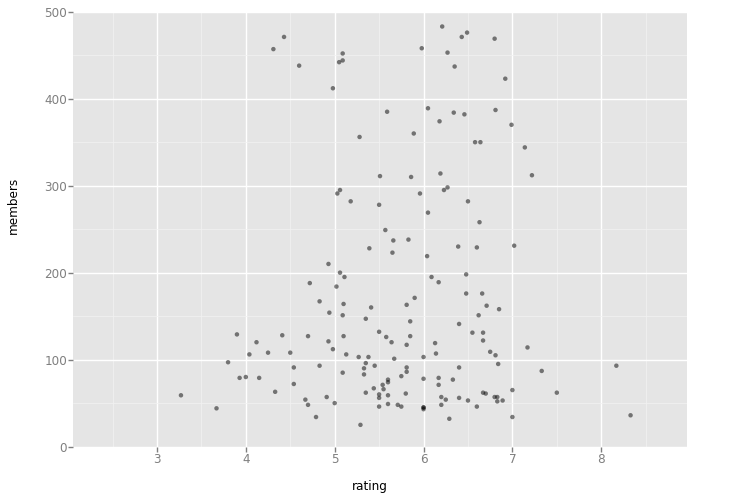

<ggplot: (170607937172)>

In [33]:
ggplot(subset_df, aes(x = 'rating', y = 'members')) +\
geom_point(alpha = 0.5) +\
ylim(0,500) 

From the plot - 
1. None(world) has no events - maybe its like the start page or something
2. possible linear relationship between event count and game time? 
3. World seems to be independent of game_time and event_count? 

In [68]:
import json

In [84]:
subset_df.event_data.iloc[2]

'{"description":"That egg held the right amount of water to fill that hole.","identifier":"507","media_type":"animation","total_duration":3633,"round":1,"event_count":30,"game_time":46576,"event_code":3021}'

### Converting the json format of event_data into more rows:
1. media_type
2. total_duration(?)

## Data cleaning/ dplyr time 
<list>
    1. Franchises usually can be obtained by doing a string split on ":"(or its just the trend) -> create a new boolean variable (is_part_of_franchise) <br>
    2. will have to split the genre by "," -> send through one hot encoding 
    3. Do simple imputing on the missing values for episode( maybe using mode?)
</list>

## Building model

Basic Random forest using episodes, rating and members. 

In [73]:
m = RandomForestRegressor(n_jobs=-1, random_state = 0)
m.fit(X_train,y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').